# 18.S190/6.S090 Problem Set 1 Solutions

## Problem 1 (5+5+6+4 points)

The [course notebook on finite differences](https://github.com/mitmath/numerical_hub/blob/fbcbf6adef724392624921c5a7cf8a9d53330347/notes/finite-differences.ipynb)
includes, without derivation, a mysterious four-line Julia function
called `stencil` that can compute finite-difference rules for
an arbitrary number of points.  The `stencil` function is reproduced below, in both Julia and Python.

In particular, if you want to compute
the $m$-th derivative of a smooth (analytic) scalar function $f(x)$
at $x_{0}$, it returns the weights $w_{k}$ of an $n$-point ($n>m$)
finite-difference rule from evaluating $f$ at points $x_{k}$ for
$k=1\ldots n$:
$$
f^{(m)}(x_{0})\approx\sum_{k=1}^{n}w_{k}f(x_{k})
$$
by solving the system of equations $Aw=e_{m+1}$, where $e_{j}\in\mathbb{R}^{n}$
is the Cartesian unit vector in the $j$-th direction and $A$ is
an $n\times n$ matrix with entries $A_{ij}=\frac{(x_{j}-x_{0})^{i-1}}{(i-1)!}$ (where $i, j = 1, \ldots, n$ are the rows and columns of $A$, respectively).

Here, you will analyze and derive this technique.

1. Let $x_{0}=0$. According to the notes, you can then compute $f^{(m)}(y)\approx\frac{1}{h^{m}}\sum_{k=1}^{n}w_{k}f(y+hx_{k})$
for an arbitrary point $y$ and an arbitrary step-size scaling factor
$h$ (which can be made smaller and smaller to reduce truncation errors; i.e. $h=\delta x$).
Derive this formula from the $f^{(m)}(x_{0})\approx \cdots$ formula above (via the chain rule and a change of variables).

2. Now evaluate it for $x_{0}=0$ (`0//1` in Julia for exact rational results)
and $x=[0,1,2,3]$ with $m=1$, i.e. using $n=4$ equally spaced points
$\ge x_{0}$ (a *higher-order* "forward-difference" formula). Use the resulting weights, in the formula scaled by
$h$ as above, to approximate the derivative $f'(1)$ for $f(x)=\sin(x)$,
and plot the relative error (compared to the exact derivative) as
a function of $h$ on a log–log scale, similar to the course notebook.
What power law in $h$ does the truncation error (approximately) seem
to follow? That is, what is the “order of accuracy”?

3. Derive the stencil equation $Aw=e_{m+1}$ above: write out the first
$n$ terms of the Taylor series (up to the $f^{(n-1)}$ derivative) for $f(x_{0}+\delta x)$, and try
to find a linear combination of this series evaluated at $\delta x=x_{k}-x_{0}$
for $k=1\ldots n$ in such a way that you obtain $f^{(m)}(x_{0})$.

4. Explain the output of `stencil` for $x =[-1,+1]$, $x_{0}=0$ (or `0//1` in Julia for exact rational results), and $m=0$?

### Solutions:


1. (The key here is to realize that $f(x)$ represents *any* function here, so the function in part 1 can be different from the function in the problem description; it might be clearer to give one of them a different name $g(x)$ as we do here.)  Consider the function $g(x) = f(y+hx)$.  By the chain rule, $g^{(m)}(x) = h^m f^{(m)}(y+hx)$, so it follows that $f^{(m)}(y) = \frac{1}{h^m} g^{(m)}(0)$.  Since $x_0 = 0$, plug in the finite-difference formula for $g^{(m)}(0) \approx \sum_{k=1}^n w_k g(x_k) = \sum_{k=1}^n w_k f(y+h x_k)$, and the result follows.

    (The key thing to remember is that the finite-difference stencil is for *any* function, not just for functions called "$f$")
   
2. For $x=[0,1,2,3]$, the 'stencil' function returns $w = [-11/6, 3, -3/2, 1/3]$ (see Julia code below).  Trying it out numerically for $\sin'(1)$, we find that the error scales as $\boxed{\sim h^3}$, i.e.~it is *third-order accurate*.

    
3.  The familiar Taylor series formula using $\delta x = (x_j-x_0)$ takes the form
$f(x_0 + (x_j-x_0) ) = f(x_j)   = \sum_{i=1}^\infty \frac{f^{(i-1)}(x_0)}{ (i-1)! } (x_j -x_0)^{i-1}.$ Letting $A_{ij}=(x_j-x_0)^{i-1}/(i-1)!$, as suggested, we have that
$f(x_j) = \sum_{i=1}^\infty A_{ij} f^{(i-1)}(x_0)$.  To form the approximation we truncate to $n$ terms, and write the equations in matrix form:
$
\begin{pmatrix}
f(x_1) \\ \vdots \\ f(x_n) 
\end{pmatrix}
=
A^T
\begin{pmatrix}
f(x_0) \\ \vdots \\ f^{(n-1)}(x_0) 
\end{pmatrix} .
$
Taking an inner product with $e_m$ and rearranging we see that
$ \begin{pmatrix}
f(x_1) \\ \vdots \\ f(x_n) 
\end{pmatrix}^T A^{-1}e_m = f^{(m)}(x_0)$
as desired, since the left hand side is exactly $\sum_{k=1}^n w_k f(x_k)$

4. The 'stencil' function returns $w = [\frac{1}{2}, \frac{1}{2}]$ (see Julia code below). The $m=0$-th derivative is simply the function value itself — this is is simply interpolation.  In particular, we are interpolating from two points $x=\pm 1$ to the midpoint $x=0$, corresponding to **linear interpolation**, which has equal weights at the midpoint.

In [1]:
### in Julia:
function stencil(x::AbstractVector{<:Real}, x₀::Real, m::Integer)
    ℓ = 0:length(x)-1
    m in ℓ || throw(ArgumentError("invalid derivative order m"))
    A = @. (x' - x₀)^ℓ / factorial(ℓ)
    return A \ (ℓ .== m) # vector of weights w
end

stencil (generic function with 1 method)

#### part 1.2

In [2]:
w = stencil(0:3, 0//1, 1)

4-element Vector{Rational{Int64}}:
 -11//6
    3
  -3//2
   1//3

Let's try it out numerically to estimate $\sin'(1)$ as suggested, plotting the error vs $h$ compared to the exact answer of $\cos(1)$ on a log–log scale:

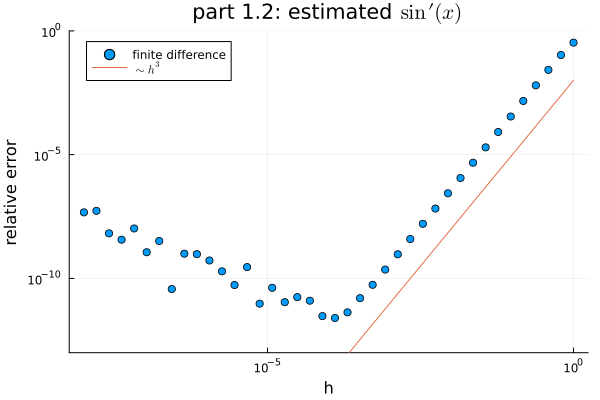

In [3]:
using Plots
h = exp10.(range(-8, 0, length=40)) # from 10⁻⁸ to 10⁰
finite_difference = [ sum(sin.(1 .+ (0:3) * h) .* w) / h for h in h ]
scatter(h, abs.(finite_difference .- cos(1)) ./ cos(1), marker=:circle, xscale=:log10, yscale=:log10, leg=:topleft,
     xlabel="h", ylabel="relative error", title=raw"part 1.2: estimated $\sin\prime(x)$", label="finite difference")
plot!(h, h.^3 .* 1e-2, label=raw"$\sim h^3$", ylim=(1e-13, 1))

#### part 1.4

In [4]:
stencil([-1, 1], 0//1, 0)

2-element Vector{Rational{Int64}}:
 1//2
 1//2

## Problem 2 (4+4+4+8 points)

Write a function `myexp(x)` (in Julia or Python) to compute $e^x$ directly from the Taylor series definition:
$$
e^x = 1 + x + \frac{x^2}{2} + \cdots + \frac{x^n}{n!} + \cdots \, .
$$
(in the default `Float64`/`float` precision … no fair using arbitrary-precision arithmetic).

1. Explain how you can compute each term in the series from the preceding term.  (Not only is this more efficient, but it also helps avoid overflow compared to the naive approach where you compute $x^n$ and $n!$ *separately* and then divide them.)

2. Explain how you decided how many terms to sum, to make reasonably sure that the omitted terms have a negligible contribution.  (Your method should depend on $x$.  Does not need a rigorous argument, just a reasonable explanation.)

3. Check that `myexp(100.0)` gives a small *relative* error ($< 10^{-14}$) compared to `exp(100.0)` in Julia or `math.exp(100.0)` in Python), even though your `myexp(100.0) - exp(100.0)` is probably huge.

4. Explain why `myexp(-100.0)` gives a completely wrong result, no matter how many terms you include in the sum!

### Solutions:

1. Each term is $x/n$ times the previous term
2. The summation should stop when the current term is sufficiently small, but how small, and small compared to what?   Ideally, it would stop when it the term is small compared to the *final* answer $\exp(x)$, but we don't know that, so instead we stop when it is small **compared to the current sum**.  How small depends on the tolerance, but probably it should be close to the machine precision for the current floating-point type.

Here is an example implementation in Julia.   We made it a little fancier than strictly necessary to illustrate a couple of points:
* It uses `eps(typeof(float(real(x)))))` to compute the precision of the type of $x$, taking the real part in case $x$ is complex, and converting to a floating-point type first in case $x$ is an integer or somesuch.  This way, the function is "type generic" — it should work equally well (or equally badly, as we'll see) for arguments of any desired precision or numeric type.
* We also take an argument setting the maximum number of terms, in case we want to manually choose the number of terms.  (This is set to the largest allowable integer, effectively infinity, by default).

In [5]:
function myexp(x; tol=eps(typeof(float(real(x)))), max_terms = typemax(Int))
    sum = 1 + (term = float(x))
    n = 2
    while abs(term) > abs(sum) * tol && n < max_terms
        term *= x/n
        n += 1
        sum += term
    end
    return sum
end

myexp (generic function with 1 method)

Let's do a quick test on `exp(1)`, which should be $e = 2.71828182845904523536\ldots$:

In [6]:
myexp(1)

2.7182818284590455

**part 3:** The difference is huge, but the relative error is indeed very small, close to machine precision as desired:

In [7]:
@show myexp(100) - exp(100) # absolute difference

@show abs( (myexp(100) - exp(100)) / exp(100) ) # relative error

myexp(100) - exp(100) = 9.903520314283042e27
abs((myexp(100) - exp(100)) / exp(100)) = 3.684184799919866e-16


3.684184799919866e-16

**part 3:**  With $x = -100$, we *should* get a tiny answer:

In [8]:
exp(-100)

3.720075976020836e-44

but instead we get a *huge* answer, **completely wrong** (off by more than 60 orders of magnitude!):

In [9]:
myexp(-100)

8.144652745098073e25

Why is this?

Think about how this is supposed to work.  If $x = -100$, how is $1 + x + x^2/2 + x^3/6 + \cdots$ supposed to give a tiny answer $\approx 3.7 \times 10^{-44}$.   The individual terms in the sum are *not* small, and many of them are quite large!    Let's look at the first 20 terms:

In [10]:
x = -100
for i = 1:20
    println("x^$i / $(i)! = ", x^i / factorial(i))
end

x^1 / 1! = -100.0
x^2 / 2! = 5000.0
x^3 / 3! = -166666.66666666666
x^4 / 4! = 4.1666666666666665e6
x^5 / 5! = -8.333333333333333e7
x^6 / 6! = 1.3888888888888888e9
x^7 / 7! = -1.984126984126984e10
x^8 / 8! = 2.4801587301587302e11
x^9 / 9! = -2.755731922398589e12
x^10 / 10! = 2.1401784698666892e12
x^11 / 11! = -4.671496836978475e10
x^12 / 12! = 4.1832098373093047e9
x^13 / 13! = 4.0754067982483757e8
x^14 / 14! = 5.1365861371613406e7
x^15 / 15! = -3.8824224092348833e6
x^16 / 16! = -421282.5861428965
x^17 / 17! = -11254.297700029196
x^18 / 18! = -863.2968771650886
x^19 / 19! = -5.650860980758128
x^20 / 20! = -2.0744859997684055


The terms *eventually* start to decrease, as they must, since this is a convergent series for all $x$, but they get up to about $10^{12}$ before they start decreasing.

However, they have **alternating signs**.   So, what *should* happen is that the terms should *cancel* to leave our desired tiny result.  But in finite precision, there is a [catastrophic cancellation](https://en.wikipedia.org/wiki/Catastrophic_cancellation) as discussed in class — instead of cancelling to leave a tiny remainder, roundoff errors prevent the cancellation from happening as it should, and we are **left with garbage** (all of the correct digits cancel).

How many digits *would* we need for this to work?  We are getting something on the order of $10^{25}$, but the *correct* answer is on the order of $10^{-44}$.  This suggests that we need at least 69 digits or more to get something remotely correct.  Let's try it, telling Julia to use the **same formula** and the **same code** (which was carefully written to work in any precision, remember) with **100 digits** of precision, and then round the final answer back to `Float64`

In [11]:
setprecision(100, base=10) # 100 decimal digits of precision
y = myexp(big"-100.0") # pass a `BigFloat` arbitrary precision type
@show Float64(y) # round back to Float64
@show exp(-100) # also show the correct answer

Float64(y) = 3.7200759760208267e-44
exp(-100) = 3.720075976020836e-44


3.720075976020836e-44

Yes, the series does indeed work if we have enough precision, but we need *exponentially many digits* for large negative $x$.

**Taylor series are a terrible way** to compute exponentials in general!

## Problem 3 (5+5 points)

Write a function $L4(x,y)$ in Julia or Python that computes the "$L_4$ norm" $L4(x,y) = (x^4 + y^4)^{1/4}$ of two real (floating-point) scalars $x$ and $y$.

1. If you implement this in the most straightforward way, directly from the formula above, does your code give an accurate answer for `L4(1e-100, 0.0)`?  What about for `L4(1e100, 0.0)`?  Why or why not?
2. *Fix* your code so that it gives an accurate answer (a *small relative error* close to machine precision)) for all floating-point inputs $x$ and $y$ (including the case in the previous part). (No fair resorting to higher-precision arithmetic!)

### Solutions

In [12]:
L4(x,y) = (abs(x)^4 + abs(y)^4)^(1/4)

L4 (generic function with 1 method)

**part 1**: 

We should have `L4(x,0)` give $|x|$, but for very small or very large `x` we get floating-point **underflow** or **overflow**, respectively. In the default double precision (`Float64`):

In [13]:
L4(1e-100, 0) # (1e-100)⁴ underflows to 0.0

0.0

In [14]:
L4(1e+100, 0)  # (1e+100)⁴ overflows to Inf

Inf

(Note that Python instead throws an OverflowError in this case, though you can get it to give `Inf` if you use NumPy.   It's a bit annoying to investigate floating-point things in Python.  Regardless, you don't get the answer `1e100` you want in Python.)

**part 2:** 

To eliminate this problem, we can simply compute $s = \max\{|x|,|y|\}$ and then pull out this scale factor, since in exact arithmetic $L_4(x,y) = s L_4(x/s,y/s)$ for any $s > 0$.  In this way, we avoid underflow/overflow in the leading-order term.  (If $|y|\ll |x|$ and $|y/x|^4$ underflows to zero, we don't care, because $1 \oplus |y/x|^4$ will round to `1.0` long before that point.)

In [15]:
function L4good(x,y)
    ax, ay = abs(x), abs(y)
    s = max(ax,ay)
    if s == 0
        return float(s) # don't divide by zero if x==y==0
    else
        return s * ((ax/s)^4 + (ay/s)^4)^(1/4)
    end
end

L4good (generic function with 1 method)

In [16]:
L4good(1e-100, 0)

1.0e-100

In [17]:
L4good(1e+100, 0)

1.0e100

In [18]:
L4good(0, 0)

0.0

If we compute the maximum relative error (compared to BigFloat) for million random numbers with random magnitudes from $10^{−308}$ to $10^{+308}$, we can it is accurate to within a few ulps:

In [19]:
maxerr = 0.0
for i = 1:10^6
    x = (rand() - 0.5) * 10.0^rand(-308:308)
    y = (rand() - 0.5) * 10.0^rand(-308:308)
    result = L4good(x,y)
    exact = L4good(big(x), big(y)) # in 256-bit precision by default
    maxerr = max(maxerr, Float64(abs(result - exact) / abs(exact)))
end
println("maximum relative err = ", maxerr, " = ", maxerr/eps(Float64), " ulps.")

maximum relative err = 5.651520878702997e-16 = 2.5452187323403397 ulps.


## Problem 4 ((2+3)+(3+6) points)

In this problem set, you will apply two interpolation methods to approximate the function:

$$
s(t) = t^3 - t^2 + 2t, \quad t \in [0,5].
$$

We will use two different grids for interpolation:

- **Uniform Grid:** Equally spaced nodes over $[0,5]$.
- **Non-Uniform Grid:** Unequally spaced nodes that resemble experimental measurements.

The corresponding function values are provided below:

| $t$ (Uniform) | $s(t)$ |
|-------------------|------------|
| 0  | 0  |
| 1  | 2  |
| 2  | 8  |
| 3  | 24 |
| 4  | 56 |
| 5  | 110 |

| $t $ (Non-Uniform) | $ s(t) $ |
|----------------------|------------|
| 0.0  | 0.000  |
| 0.8  | 1.472  |
| 2.1  | 9.051  |
| 3.0  | 24.000 |
| 4.8  | 97.152 |
| 5.0  | 110.000 |

---

### Interpolation Methods

For this problem, you will write **your own implementation** (not just calling a pre-written library function) of the following two interpolation methods:

1. **Variant A (Consecutive Interpolation):**  
   On each subinterval $[t_i,t_{i+1}]$ (assuming that the $t_i$ are sorted in ascending order), the interpolant is the linear function connecting the two consecutive data points $(t_i,s(t_i))$ and $(t_{i+1},s(t_{i+1}))$. 

2. **Variant B (Inverse Distance Weighted Interpolation):**  
   For an evaluation point $t$, compute the following ratio of sums over *all* the data points:

   $$
   s_B(t)= \frac{\sum_i \frac{1}{|t-t_i|^2}\, s(t_i)}
   {\sum_j \frac{1}{|t-t_j|^2}}
   $$

   Note that as $t \to t_i$ (one of the data points), $s_B(t) \to s(t_i)$.

---

### Part 1: Implementing and inspecting the interpolations

**(a)** For evaluation points $t^*=1.5$ and $t^*=2.5$, compute the interpolated value using both Variant A and Variant B on the uniform grid. Repeat the interpolation for the non-uniform grid.  

**(b)** Plot the two interpolants (Variant A and Variant B) for each grid, for a dense set of points $t \in [0,5]$.  (Be careful when evaluating variant B exactly at a data point, so you don't divide `Inf` by `Inf`.) 

---

### Part 2: Accuracy Analysis

#### (a) Variant A

Given that the true function is $ s(t)=t^3-t^2+2t $, for an arbitrary evaluation point $t_0$ in some subinterval $[t_i,t_{i+1}]$, perform a Taylor series expansion of $s(t)$ about $t_i$.  

Using this Taylor series, show that the local interpolation error at any point $t_0$ can be expressed in terms of the following asymptotic upper bound (up to constant factors, i.e. "big-O" notation as in class):

$$
\text{Error} = \mathcal{O}((\Delta t)^2),
$$

where  $\Delta t = \max \{ t_{i+1}-t_i \}$ (the maximum spacing), as $\Delta t \to 0$.  Does it matter if the points $t_i$ are uniform or nonuniform?

#### (b) Variant B

For the inverse distance weighted interpolation (Variant B), plot the error at $t = 2.5$ on a log–log scale as a function of the number of points $N$ for uniformly spaced points ($\Delta t = 5/(N+1)$), for a sequence of *even* numbers $N$ (so that $t=2.5$ is not one of the data points), generating data from the formula $s(t)=t^3-t^2+2t$.

What convergence rate do you observe, i.e. $\mathcal{O}((\Delta t)^2)$ or $\mathcal{O}(\Delta t)$ or ...?

Prove this convergence rate, or at least try to make a convincing informal argument.


### Solutions

#### part 1

First, let's get the data into Julia, and write functions to do the interpolation (rather than a library routine).

In [20]:
s(t) = t^3 - t^2 + 2t # exact function

t_uniform = 0:5
s_uniform = s.(t_uniform)

t_nonuniform = [0.0, 0.8, 2.1, 3.0, 4.8, 5.0]
s_nonuniform = s.(t_nonuniform)

# piecewise linear interpolation, assuming t is sorted in ascending order
function interpA(t, s, tnew::Real)
    t[begin] ≤ tnew ≤ t[end] || throw(ArgumentError("t = $tnew is out of range"))
    i = searchsortedfirst(t, tnew) # index of first value ≥ t
    i == 1 && return s[1] # tnew == t[1]
    # t[i-1] ≤ tnew ≤ t[i]:
    return s[i-1] + (tnew - t[i-1]) * ((s[i] - s[i-1]) / (t[i] - t[i-1]))
end

# inverse-distance interpolation
function interpB(t, s, tnew::Real)
    numerator = denominator = float(zero(tnew))
    for (t, s) in zip(t, s)
        tnew == t && return s
        term = 1/(tnew - t)^2
        numerator += s * term
        denominator += term
    end
    return numerator / denominator
end

# vectorized versions, for convenience
interpA(t, s, tnew::AbstractVector) = [interpA(t, s, tnew) for tnew in tnew]
interpB(t, s, tnew::AbstractVector) = [interpB(t, s, tnew) for tnew in tnew]

interpB (generic function with 2 methods)

**1(a)** Let's evaluate the interpolants at 1.5 and 2.5 as requested, for both the uniform and nonuniform grid.   These are the answers you *should* get (up to roundoff errors):

In [21]:
@show interpA(t_uniform, s_uniform, [1.5, 2.5])
@show interpB(t_uniform, s_uniform, [1.5, 2.5])
@show interpA(t_nonuniform, s_nonuniform, [1.5, 2.5])
@show interpB(t_nonuniform, s_nonuniform, [1.5, 2.5]);

interpA(t_uniform, s_uniform, [1.5, 2.5]) = [5.0, 16.0]
interpB(t_uniform, s_uniform, [1.5, 2.5]) = [7.513947389334818, 18.610038610038607]
interpA(t_nonuniform, s_nonuniform, [1.5, 2.5]) = [5.553000000000001, 15.695]
interpB(t_nonuniform, s_nonuniform, [1.5, 2.5]) = [9.64355866391768, 17.023173805603204]


**1(b)** We also plot both interpolants, for both grids.

(It is a good idea to do this anyway — you should make sure that the interpolants go through all the data points, or you have done something wrong!)

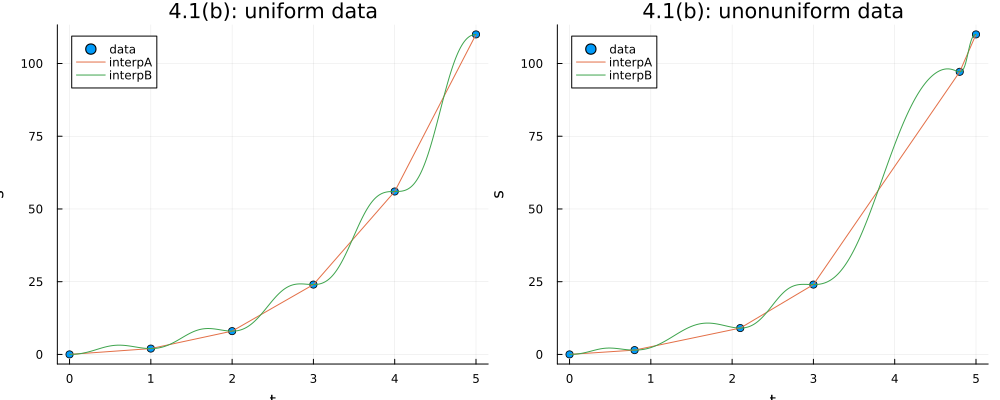

In [22]:
using Plots
t = range(0,5,length=400)
scatter(t_uniform, s_uniform, label="data", title="4.1(b): uniform data", layout=(1,2), size=(1000,400),
        xlabel="t", ylabel="s")
plot!(t, interpA(t_uniform, s_uniform, t), label="interpA")
plot!(t, interpB(t_uniform, s_uniform, t), label="interpB")
scatter!(t_nonuniform, s_nonuniform, label="data", title="4.1(b): unonuniform data", subplot=2,
         xlabel="t", ylabel="s")
plot!(t, interpA(t_nonuniform, s_nonuniform, t), label="interpA", subplot=2)
plot!(t, interpB(t_nonuniform, s_nonuniform, t), label="interpB", subplot=2)

#### part 2

**(a)** This part is nearly identical to the analysis performed in class.  Suppose that $t \in [t_i, t_{i+1}]$, so that our interpolated value is:
$$
\tilde{s} = s_i + (t - t_i) \frac{s_{i+1} - s_i}{t_{i+1} - t_i}
$$
Let's perform a Taylor expansion of $s(t)$ around $t_i$.  Then:
$$
s(t) = s_i + s_i' (t - t_i) + O((t - t_i)^2)
$$
where $s_i' = s'(t_i)$.  Then 
$$
s_{i+1} = s_i + s_i' (t_{i+1} - t_i) + O((t_{i+1} - t_i)^2)
$$
and our formula above becomes:
$$
\tilde{s} = s_i + (t - t_i) \left[ s_i' + O(t_{i+1} - t_i) \right] = s(t) + O((t_{i+1} - t_i)^2) = s(t) + O(\Delta t^2)
$$
since $t - t_i \le t_{i+1} - t_i$, where $\Delta t$ denotes the maximum spacing.  So, we expect the error from `interpA` (piecewise linear interpolation) to go as $\boxed{ O(\Delta t^2) }$ as in class, **regardless of whether the spacing is uniform or nonuniform**.

**(b)**

In this part, we first look at the error for method B experimentally at $t=2.5$, for $N$ equally spaced points, with even $N$, compared to the exact value $s(2.5)$.  Let's try it.  We're expecting a power-law relationship, so we'll use a log–log scale as usual:

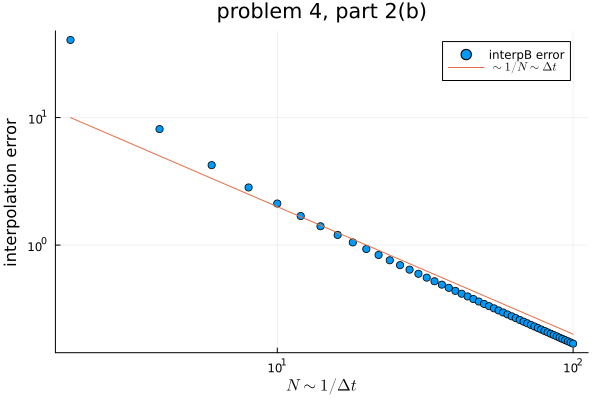

In [23]:
N = 2:2:100 # even N from 2 to 100
error = map(N) do N
    t = range(0,5, length=N) # uniform points
    interpB(t, s.(t), 2.5) - s(2.5)
end

scatter(N, abs.(error), xscale=:log10, yscale=:log10, xlabel=raw"$N \sim 1/\Delta t$", ylabel="interpolation error", label="interpB error")
plot!(N, 20 ./ N, label=raw"$\sim 1/N \sim \Delta t$", title="problem 4, part 2(b)")

The error pretty clearly seems to be asymptotically going as $\boxed{O(\Delta t)}$ (**first-order** convergence), becoming more and more parallel to the line we added for comparison.

Why is this?  Making a fully rigorous argument here is a bit tricky because of the "long-range interactions" of the inverse-distance approach, but let's at least have a go:

We are computing:
$$
\tilde s(t) = \frac{\sum_i \frac{s(t_i)}{|t - t_i|^2}}{\sum_j \frac{1}{|t - t_j|^2}}
$$
Now, write $s(t_i) = s(t) + s(t_i) - s(t)$, so that we can separate out the error term more clearly.  The first $s(t)$ term factors out and the numerator cancels the denominator, leaving us with:
$$
\tilde s(t) = s(t) + \underbrace{\frac{\sum_i \frac{s(t_i) - s(t)}{|t - t_i|^2}}{\sum_j \frac{1}{|t - t_j|^2}}}_\text{error}
$$
Let's consider this error term one piece at a time, for uniformly spaced points with spacing $\Delta t$: $t_j = j \Delta t$.  

First, the denominator of the error is:
$$
\sum_j\frac{1}{|t - t_j|^2} = \frac{1}{\Delta t^2} \underbrace{\sum_j \frac{1}{|t/\Delta t - j|^2}}_\text{some number}
$$
Assuming $t/\Delta t$ is a half integer as in the case above, this is just some number times $1/\Delta t^2$.   This number is bounded (does not diverge) even as $\Delta t \to 0$ and the number of terms in the sum diverges, because $\sum_{j=1}^\infty 1/j^2$ converges (this is the famous [Basel problem](https://en.wikipedia.org/wiki/Basel_problem)).   (Conversely, if $t/\Delta t$ goes to an integer, then that term blows up in both the numerator and denominator and $\tilde s(t)$ becomes exact.)

So, the error term is proportional to
$$
\text{error} \sim \Delta t^2 \sum_i \frac{s(t_i) - s(t)}{|t - t_i|^2}
$$
Now, let's consider $t_i$ terms that are *close* to $t$, e.g. say for $t$ within $10\Delta t$.  For these terms, we can Taylor expand around $t_i$:
$$
\Delta t^2 \frac{s(t_i) - s(t)}{|t - t_i|^2} = \frac{s(t_i) - \left[ s(t_i) + O(t - t_i) \right]}{|t - t_i|^2} = \Delta t^2 \frac{O(1)}{|t - t_i|} = O(\Delta t)
$$
Here, we've used the fact that, for such nearby $t_i$ where the Taylor expansion is valid, the denominator $t-t_i$ is some multiple of $\Delta t$.  So, this is a first-order error term!

What about the $t_i$ terms that are *far* from $t$?   This is a bit trickier to analyze.  One way to approach it is to view the sum as going to an integral as $\Delta t \to 0$:
$$
\Delta t^2 \sum_i \frac{s(t_i) - s(t)}{|t - t_i|^2} \to \Delta t \int \frac{s(t') - s(t)}{|t - t'|^2} dt' = O(\Delta t)
$$
This integrand is singular at $t' = t$, but we already showed that terms nearby to $t$ converge — removing these nearby terms corresponds to removing the singularity, e.g. removing a ball $[t-10\Delta t, t + 10\Delta t]$ from the integration domain.  The remaining integral is a [Cauchy principal value](https://en.wikipedia.org/wiki/Cauchy_principal_value) and is finite, leading again to a first-order $O(\Delta t)$ error term.

* Probably most students wrote an even more informal argument, but the key step is to realize that the denominator is a convergent sum and goes as $1/\Delta t^2$, even though the number of terms diverges.